# Multilayer Perceptron and Backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1 

Consider the neural network considered in the first question of the theoretical component of the practical class, with number of units: 4,4,3,3.

![](https://drive.google.com/uc?id=1SHUgdosKp6AX8rRAACCZ5nb4kUXreI3g)

Assume all units, except the ones in the output layer, use the hyperbolic tangent activation function. 

Consider the following training example:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}^\intercal $,   $\mathbf{y} =\begin{bmatrix} 0\\ 1\\ 0 \end{bmatrix}$

❓ Using the squared error loss do a stochastic gradient descent update, initializing all connection weights and biases to 0.1 and a  learning rate η = 0.1:

1. Perform the forward pass
2. Compute the loss
3. Compute gradients with backpropagation
4. Update weights

In [2]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

# Initialize weights with correct shapes 

W1 = .1 * np.ones((units[1], units[0]))
b1 = .1 * np.ones(units[1])
W2 = .1 * np.ones((units[2], units[1]))
b2 = .1 * np.ones(units[2])
W3 = .1 * np.ones((units[3], units[2]))
b3 = .1 * np.ones(units[3])

In [3]:
# Forward Pass

h0 = inputs[0]

z1 = W1.dot(h0) + b1
h1 = np.tanh(z1)

z2 = W2.dot(h1) + b2
h2 = np.tanh(z2)

z3 = W3.dot(h2) + b3

y = labels[0]

print(z3)

[0.16396106 0.16396106 0.16396106]


In [4]:
# Loss

loss = .5*(z3 - y).dot(z3 - y)

print(loss)

0.37636378397755565


In [5]:
# Backpropagation

grad_z3 = z3 - y  # Grad of loss wrt z3.

# Gradient of hidden parameters.
grad_W3 = grad_z3[:, None].dot(h2[:, None].T)
grad_b3 = grad_z3

# Gradient of hidden layer below.
grad_h2 = W3.T.dot(grad_z3)

# Gradient of hidden layer below before activation.
grad_z2 = grad_h2 * (1-h2**2)   # Grad of loss wrt z3.

# Gradient of hidden parameters.
grad_W2 = grad_z2[:, None].dot(h1[:, None].T)
grad_b2 = grad_z2

# Gradient of hidden layer below.
grad_h1 = W2.T.dot(grad_z2)

# Gradient of hidden layer below before activation.
grad_z1 = grad_h1 * (1-h1**2)   # Grad of loss wrt z3.

# Gradient of hidden parameters.
grad_W1 = grad_z1[:, None].dot(h0[:, None].T)
grad_b1 = grad_z1

In [6]:
# Update Gradients

# Gradient updates.
eta = 0.1
W1 -= eta*grad_W1
b1 -= eta*grad_b1
W2 -= eta*grad_W2
b2 -= eta*grad_b2
W3 -= eta*grad_W3
b3 -= eta*grad_b3

❓ Let's say we were using the same training example but with the following changes:
- The output units have a softmax activation function
- The error function is cross-entropy

Keeping the same initializations and learning rate, adjust your computations to the new changes.

**Solution:** We need only to change:  
- the output, *i.e.*, $\hat{y} = softmax(z_3)$ instead of $\hat{y} = z_3$
- the loss computation to $L = -y.log(\hat{y})$
- the gradient of the loss with respect to $z_3$: $\frac{dL}{dz_3}$

All other steps remain unchanged.

In [7]:
# Your code here

W1 = .1 * np.ones((units[1], units[0]))
b1 = .1 * np.ones(units[1])
W2 = .1 * np.ones((units[2], units[1]))
b2 = .1 * np.ones(units[2])
W3 = .1 * np.ones((units[3], units[2]))
b3 = .1 * np.ones(units[3])

# Forward Pass

h0 = inputs[0]

z1 = W1.dot(h0) + b1
h1 = np.tanh(z1)

z2 = W2.dot(h1) + b2
h2 = np.tanh(z2)

z3 = W3.dot(h2) + b3

p = np.exp(z3) / sum(np.exp(z3))
y = labels[0]

# Loss

loss = -y.dot(np.log(p))

# Backpropagation

grad_z3 = p - y  # Grad of loss wrt p

# Gradient of hidden parameters.
grad_W3 = grad_z3[:, None].dot(h2[:, None].T)
grad_b3 = grad_z3

# Gradient of hidden layer below.
grad_h2 = W3.T.dot(grad_z3)

# Gradient of hidden layer below before activation.
grad_z2 = grad_h2 * (1-h2**2)   # Grad of loss wrt z3.

# Gradient of hidden parameters.
grad_W2 = grad_z2[:, None].dot(h1[:, None].T)
grad_b2 = grad_z2

# Gradient of hidden layer below.
grad_h1 = W2.T.dot(grad_z2)

# Gradient of hidden layer below before activation.
grad_z1 = grad_h1 * (1-h1**2)   # Grad of loss wrt z3.

# Gradient of hidden parameters.
grad_W1 = grad_z1[:, None].dot(h0[:, None].T)
grad_b1 = grad_z1

❓ Complete functions `forward`, `compute_loss`, `backpropagation` and `update_weights` generalized to perform the same computations as before, but for any MLP architecture.

In [8]:
'''
x: single observation of shape (n,)
weights: list of weight matrices [W1, W2, ...]
biases: list of biases matrices [b1, b2, ...]

y: final output
hiddens: list of computed hidden layers [h1, h2, ...]
'''

def forward(x, weights, biases):
    num_layers = len(weights)
    g = np.tanh
    hiddens = []
    # compute hidden layers
    for i in range(num_layers):
            h = x if i == 0 else hiddens[i-1]
            z = weights[i].dot(h) + biases[i]
            if i < num_layers-1:  # Assuming the output layer has no activation.
                hiddens.append(g(z))
    #compute output
    output = z
    
    return output, hiddens

def compute_loss(output, y):
    # compute loss
    probs = np.exp(output) / np.sum(np.exp(output))
    loss = -y.dot(np.log(probs))
    
    return loss   

def backward(x, y, output, hiddens, weights):
    num_layers = len(weights)
    g = np.tanh
    z = output

    probs = np.exp(output) / np.sum(np.exp(output))
    grad_z = probs - y  
    
    grad_weights = []
    grad_biases = []
    
    # Backpropagate gradient computations 
    for i in range(num_layers-1, -1, -1):
        
        # Gradient of hidden parameters.
        h = x if i == 0 else hiddens[i-1]
        grad_weights.append(grad_z[:, None].dot(h[:, None].T))
        grad_biases.append(grad_z)
        
        # Gradient of hidden layer below.
        grad_h = weights[i].T.dot(grad_z)

        # Gradient of hidden layer below before activation.
        grad_z = grad_h * (1-h**2)   # Grad of loss wrt z3.

    # Making gradient vectors have the correct order
    grad_weights.reverse()
    grad_biases.reverse()
    return grad_weights, grad_biases

## Question 2

Now we will use the MLP on real data to classify handwritten digits.

Data is loaded, split into train and test sets and target is one-hot encoded below:

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()

inputs = data.data  
labels = data.target  
n, p = np.shape(inputs)
n_classes = len(np.unique(labels))


X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Encode labels as one-hot vectors.
one_hot = np.zeros((np.size(y_train, 0), n_classes))
for i in range(np.size(y_train, 0)):
    one_hot[i, y_train[i]] = 1
y_train_ohe = one_hot
one_hot = np.zeros((np.size(y_test, 0), n_classes))
for i in range(np.size(y_test, 0)):
    one_hot[i, y_test[i]] = 1
y_test_ohe = one_hot

❓ Complete function `MLP_train_epoch` using your previously defined functions to compute one epoch of training using SGD:

In [10]:
'''
Outputs:
    - weights: list of updated weights
    - biases: list of updated 
    - loss: scalar of total loss (sum for all observations)

'''

def MLP_train_epoch(inputs, labels, weights, biases):
    num_layers = len(weights)
    total_loss = 0
    # For each observation and target
    for x, y in zip(inputs, labels):
        # Comoute forward pass
        output, hiddens = forward(x, weights, biases)
        
        # Compute Loss and Update total loss
        loss = compute_loss(output, y)
        total_loss+=loss
        # Compute backpropagation
        grad_weights, grad_biases = backward(x, y, output, hiddens, weights)
        
        # Update weights
        
        for i in range(num_layers):
            weights[i] -= eta*grad_weights[i]
            biases[i] -= eta*grad_biases[i]
            
    return weights, biases, total_loss

Let's use a MLP with a single hidden layer of 50 units and a learning rate of $0.001$. 

❓ Run 100 epochs of your MLP. Save the loss at each epoch in a list and plot the loss evolution after training.

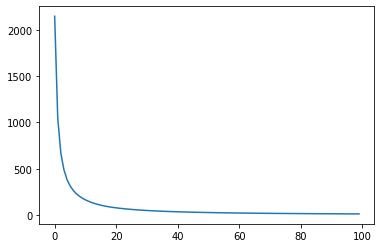

In [11]:
# Initialize weights

# Single hidden unit MLP with 50 hidden units.
# First is input size, last is output size.
units = [64, 50, 10]

# Initialize all weights and biases randomly.
W1 = .1 * np.random.randn(units[1], units[0])
b1 = .1 * np.random.randn(units[1])
W2 = .1 * np.random.randn(units[2], units[1])
b2 = .1 * np.random.randn(units[2])

weights = [W1, W2]
biases = [b1, b2]

# Learning rate.
eta = 0.001  
    
# Run epochs

losses = []

for epoch in range(100):
    weights, biases, loss = MLP_train_epoch(X_train, y_train_ohe, weights, biases)
    losses.append(loss)
    
plt.plot(losses)
plt.show()

❓ Complete function `MLP_predict` to get array of predictions from your trained MLP:

In [12]:
def MLP_predict(inputs, weights, biases):
    predicted_labels = []
    for x in inputs:
        # Compute forward pass and get the class with the highest probability
        output, _ = forward(x, weights, biases)
        y_hat = np.argmax(output)
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

❓ Compute the accuracy on the train and test sets.

In [13]:
y_train_pred = MLP_predict(X_train, weights, biases)
y_test_pred = MLP_predict(X_test, weights, biases)

print(f'Train accuracy: {(y_train_pred==y_train).mean()}')
print(f'Test accuracy: {(y_test_pred==y_test).mean()}')

Train accuracy: 1.0
Test accuracy: 0.9638888888888889


We can compare our results with Sklearn's implementation of the MLP. Compare their accuracies:

In [14]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    nesterovs_momentum=False,
                    random_state=1,
                    max_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9993041057759221
0.9722222222222222
